# Test challenge for Mejuri (Warm up)



This is a warm up for the Mejuri's test challenge. 

The objective is to have a first look of the data.

We start by reading the data and doing some exploratory analysis. We also introduce some observations and questions about the data that can lead to further analysis.

This notebook is organized as follows:
1. Preprocessing
2. Exploratory analysis

## Preprocessing

First of all, we have to do the imports

In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline

Then, read the data from the csv file. We will use a pandas Dataframe structure 

In [2]:
df = pd.read_csv('../data/orders_report.csv')

Ok, now we have the data on the 'df' variable. Lets take a look.

In [3]:
# first columns
df.head

<bound method NDFrame.head of        Orders Completed Date                 Orders Email Hash Orders Number  \
0                 2018-09-21  b6efaf41cdb44733b926b23222521439  M100008562YP   
1                 2018-09-26  bd9eabcb802d539acd17097a9963cd19  M100018185UW   
2                 2018-09-08  d6bcbdb2f3564726da36c30a96b70cba  M100041026XU   
3                 2018-09-11  3468d1e012dc8bd76b95e31ecd975521  M100057929FK   
4                 2018-09-10  95f131c2ffa9a2600df63444daabde32  M100061442OL   
5                 2018-09-14  0697059166921e625cec5d031fc9fecc  M100064927ZV   
6                 2018-09-14  0697059166921e625cec5d031fc9fecc  M100064927ZV   
7                 2018-09-21  dd50c652fe716a44be2ccb024de8ab76  M100065145LU   
8                 2018-09-13  ed4bce97bedb3a8c5573a2fe9327a685  M100081507OU   
9                 2018-09-13  ed4bce97bedb3a8c5573a2fe9327a685  M100081507OU   
10                2018-09-30  3f6936bb5515186ec74c71baf105447f  M100081994JQ   
11        

In [4]:
# What about the first row?
df.iloc[0]

Orders Completed Date                              2018-09-21
Orders Email Hash            b6efaf41cdb44733b926b23222521439
Orders Number                                    M100008562YP
Variants SKU                                        p52505564
Products Name                              Diamonds Team Ring
Line Items Quantity                                         1
Line Items Price                                          495
Material Categories Name           Solid Yellow Gold, Diamond
Material Groups Name                                      NaN
Orders Payment Total                                   559.35
Orders Currency                                           CAD
Shipping Address ISO Name                              CANADA
Purchase Locations Method                             offline
Name: 0, dtype: object

Now, let's take a look of the data types

In [5]:
df.dtypes

Orders Completed Date         object
Orders Email Hash             object
Orders Number                 object
Variants SKU                  object
Products Name                 object
Line Items Quantity            int64
Line Items Price             float64
Material Categories Name      object
Material Groups Name          object
Orders Payment Total          object
Orders Currency               object
Shipping Address ISO Name     object
Purchase Locations Method     object
dtype: object

We want to handle dates and float correcly. Let's do some changes in the data types.

In [7]:
# switch object to datetime for date columns 
df['Orders Completed Date'] = pd.to_datetime(df['Orders Completed Date'], format='%Y-%m-%d')

In [8]:
# switch object to float for numeric columns
df['Orders Payment Total'] = [float(s.replace(',','')) for s in df['Orders Payment Total']]

In [9]:
df.dtypes

Orders Completed Date        datetime64[ns]
Orders Email Hash                    object
Orders Number                        object
Variants SKU                         object
Products Name                        object
Line Items Quantity                   int64
Line Items Price                    float64
Material Categories Name             object
Material Groups Name                 object
Orders Payment Total                float64
Orders Currency                      object
Shipping Address ISO Name            object
Purchase Locations Method            object
dtype: object

Alright! Now we have the correct datatypes, so we can start with some descriptive analysis

## Descriptive analysis

Let's start the descriptive analysis with some distributions of the data.

### Dates

In [10]:
df['Orders Completed Date'].groupby([df['Orders Completed Date'].dt.year, df['Orders Completed Date'].dt.quarter]).count()

Orders Completed Date  Orders Completed Date
2016                   1                         1655
                       2                         2442
                       3                         2705
                       4                         7470
2017                   1                         6535
                       2                         7278
                       3                        12797
                       4                        33838
2018                   1                        30256
                       2                        32832
                       3                        44968
                       4                         2504
Name: Orders Completed Date, dtype: int64

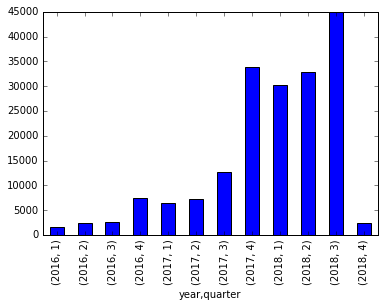

In [11]:
counts = df['Orders Completed Date'].groupby([df['Orders Completed Date'].dt.year, df['Orders Completed Date'].dt.quarter]).count()
counts.index.rename(['year', 'quarter'], inplace=True)

counts.plot(kind='bar')

Now, let's reindex the data to compare quarters among years

We can assign some colors to groups

In [13]:
df_counts = pd.DataFrame(counts)
df_counts.rename(columns={'Orders Completed Date' : 'quantity'}, inplace=True)
df_counts.reset_index(level=counts.index.names, inplace=True)
#df_counts.columns = ['Quantity']

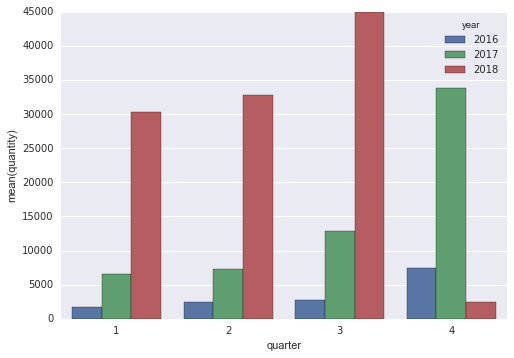

In [14]:
sns.barplot(df_counts['quarter'],df_counts['quantity'], df_counts['year'] )

Some observations:
* There is an increasing tendancy on sales in the period (2016-2018)
* 2018.Q4 is still in progress

Questions:
* What is the estimated sales volume for 2018.Q4?

### Clients

Which are the most frequent clients?

In [24]:
clients_freq = df['Orders Email Hash'].groupby(df['Orders Email Hash']).count().sort_values(ascending=False)

In [81]:
clients_freq.head(30)

Orders Email Hash
218f052ca6ae2d95157e73b89bd98f2c    117
fc932092e1efd993ebcda91e3159e7f6    103
b1faf7371b34e3e3222d3b843639efa1     98
a13cb38b64df61d9501f92e6b600ed4b     77
1c25aba1d62fde8d31482f89b9bde68c     75
3a0673bcce2751bf365c174f46ba9bf8     69
a07b5eacbb81748ef0a4c5a1c6c5ddeb     67
af1ad87d94f62ddd4695c1ef8d93f6ac     63
0dd5447ce0bc0e0167c87b47a59a0f4b     56
32395181f10334b23f664640473e89c2     51
956fa3d47640a88cffcab6ab9a161743     50
2babc97dc37580a6ef0474ba388baf32     49
449c20cd0408247252ba81b03f16f897     45
639b6ac9d7db475bdae9903d430baf16     45
6113e10c816230246d353566845f7f34     44
a7bb02fc9c31d506283def44da91ba86     44
d6bef5054b1f1bf721a27dc7d8b1ae31     40
7a7970d21c27441c3e3ed67d1b6b18a5     40
90e59f508ad898752a77a20d8a417580     39
fb7dd9d97090525d3d56814be0f7f108     38
4e4f59b13e5cbf1ee88e1a14d45db11f     38
1b6a79db5bc6240a0b19399294e014c7     37
39519de938274bdfc11540189f801f1d     37
957a003af1f965e5ddd8dc6a3b294ad7     37
e3ce8683e20663e903e4ad

What is the buying behavior of the most frequent client?

In [64]:
mostfreq_client = df[df['Orders Email Hash'] == '218f052ca6ae2d95157e73b89bd98f2c']

In [65]:
mostfreq_client = mostfreq_client['Orders Email Hash'].groupby([mostfreq_client['Orders Completed Date'].dt.year, mostfreq_client['Orders Completed Date'].dt.quarter]).count()
mostfreq_client.index.rename(['year', 'quarter'], inplace=True) 

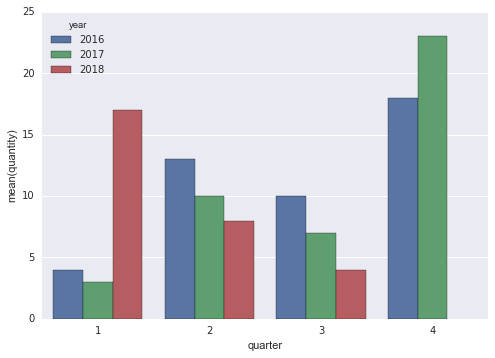

In [68]:
mostfreq_client = pd.DataFrame(mostfreq_client)
mostfreq_client.rename(columns={'Orders Email Hash' : 'quantity'}, inplace=True)
mostfreq_client.reset_index(level=mostfreq_client.index.names, inplace=True)

sns.barplot(mostfreq_client['quarter'],mostfreq_client['quantity'], mostfreq_client['year']) 

Some observartions about this client behavior:
* In the past 2 years (2016 and 2017), he/she shows a similar behavior (like a [cubic function](https://en.wikipedia.org/wiki/Cubic_function))
* In the current year, behavior changed to a decreasing tendency. 

Some questions related to this client behavior:
* Is he/she going to buy more on the Q4, acording to his previous behaviour, or is he going to keep his buying tendancy?
* Is he moving his most buying frequency to Q1? The buying window has changed for this client? 
* Is there other clients with a similar behavior pattern?

### Products

How many unique products does this dataset has?

In [28]:
df['Variants SKU'].unique().shape

(1831,)

Which are the best selling products?

In [75]:
mostfreq_products = df['Variants SKU'].groupby(df['Variants SKU']).count().sort_values(ascending=False)

In [82]:
mostfreq_products.head(30)

Variants SKU
p52505530    3070
p052597      2451
p52505557    2448
p052668      2394
p5250409     2319
p5250410     2283
p5250411     2215
p052454      2191
p000476      1794
p5250471     1745
p52505531    1722
p000422      1655
p000490      1620
p52505412    1561
p52505570    1525
p5250470     1500
p052456      1484
p052664      1432
p052649      1396
p052458      1371
p52505426    1319
p052648      1263
p52505299    1228
p52505533    1201
p052551      1157
p52505354    1103
p52505532    1080
p52505550    1073
p0004277     1069
p0004267     1021
Name: Variants SKU, dtype: int64

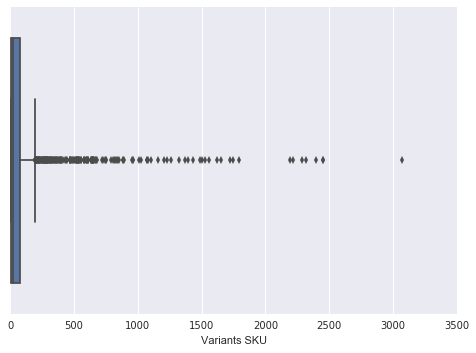

In [80]:
sns.boxplot(mostfreq_products)